# <center> TP N°2 </center>
### <center> Interpolation Polynômiale (Lagrange, Phénomène de Runge)

</center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 SI GR02 </center>
    <center> 20/10/2020 </center>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Déﬁnir un nombre de points N 
N = 2

# Créer une discrétisation 
x = np.linspace(-1, 1, N+1)
print("x : ", x)

# Créer un vecteur (yi) contenant les composantes de f(x) = sin(x)
y = []
for i in range(N+1):
    y.append(np.sin(x[i]))
print("\ny : ", y)

x :  [-1.  0.  1.]

y :  [-0.8414709848078965, 0.0, 0.8414709848078965]


In [32]:
# Interpolation de Lagrange 
def Lagrange(Xs, x_pt, y_pt):
    N = len(x_pt)
    yL = []
    
    for x in Xs:
        y = 0
        for i in range(N):
            Li = 1
            for k in range(N):
                if k != i:
                    Li *= (x - x_pt[k])/(x_pt[i] - x_pt[k])
            y += y_pt[i] * Li
        yL.append(y)
    return yL

In [33]:
Xs = np.linspace(-1, 1, 100)
P = Lagrange(Xs, x, y )

print("\nXs = \n", Xs)
print("\nP(Xs) = \n", P)


Xs = 
 [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.6363

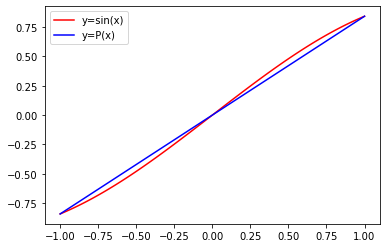

In [4]:
xsin = np.linspace(-1, 1, 100)
# ax = plt.subplots(1, 2, figsize=(10, 5))
plt.plot(xsin, np.sin(xsin), '-r', label='y=sin(x)')
plt.plot(Xs, P, '-b', label='y=P(x)')
plt.legend()

In [5]:
def interpolation_graph(N):
    x = np.linspace(-1, 1, 100)
    x_pt = np.linspace(-1, 1, N+1)
    y_pt = np.sin(x_pt)

    P = Lagrange(x, x_pt, y_pt )

    plt.plot(x, np.sin(x), '-r', label='y=sin(x)')
    plt.plot(x, P, '-b', label='y=P(x)')
    plt.legend()

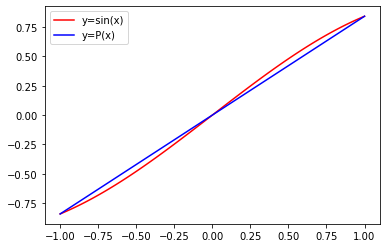

In [6]:
interpolation_graph(1)

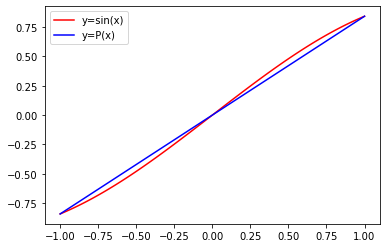

In [7]:
interpolation_graph(2)

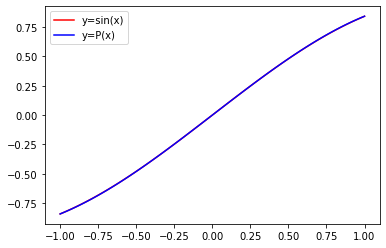

In [8]:
interpolation_graph(3)

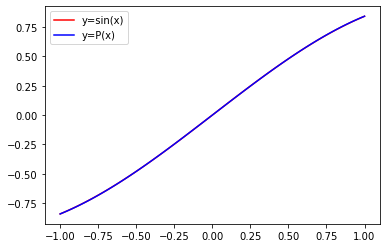

In [9]:
interpolation_graph(4)

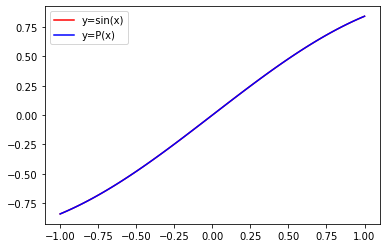

In [10]:
interpolation_graph(99)

> On constate qu'en augmentant le nombre de points d'interpolation, l'interpolée de sin() ressemble de plus en plus à la fonction sin() elle-même.

###  Phénomène de Runge 

In [11]:
def interpolation_Runge(N):
    def f1(x):
        return (1/(1+x**2))
    f = np.vectorize(f1)
    x = np.linspace(-1, 1, 100)
    x_pt = np.linspace(-1, 1, N+1)

    P = Lagrange(x, x_pt, f(x_pt))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(x, f(x), '-r', label='y= 1/(1+x^2) ')
    ax2.plot(x, P, '-b', label='y=P(x)')
    fig.legend()

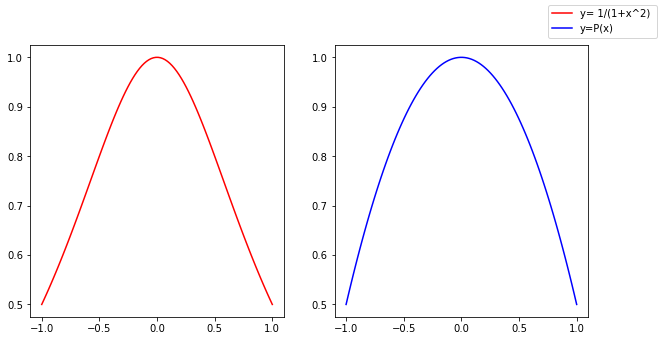

In [12]:
interpolation_Runge(2)

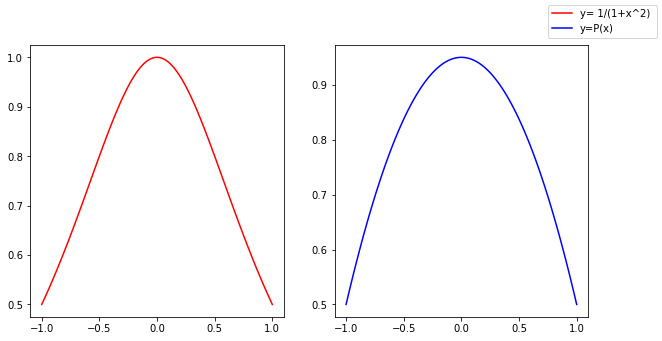

In [13]:
interpolation_Runge(3)

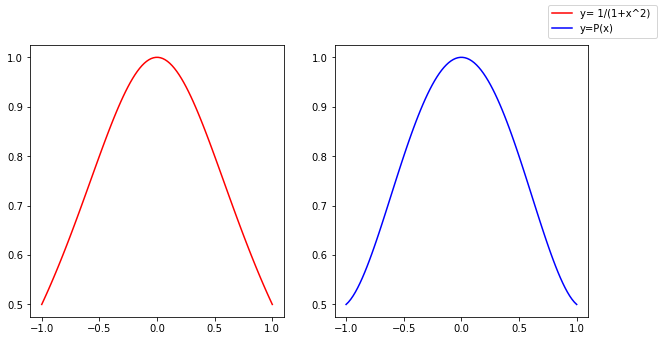

In [14]:
interpolation_Runge(4)

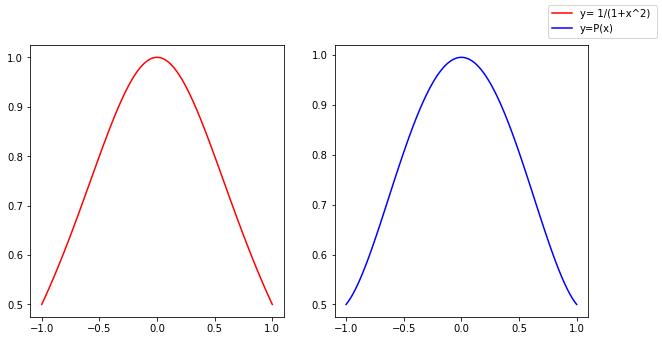

In [15]:
interpolation_Runge(5)

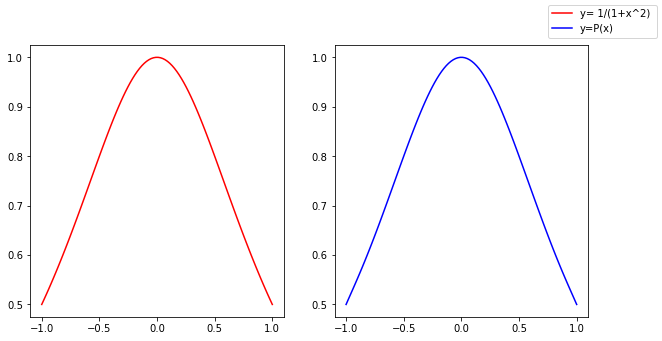

In [16]:
interpolation_Runge(10)

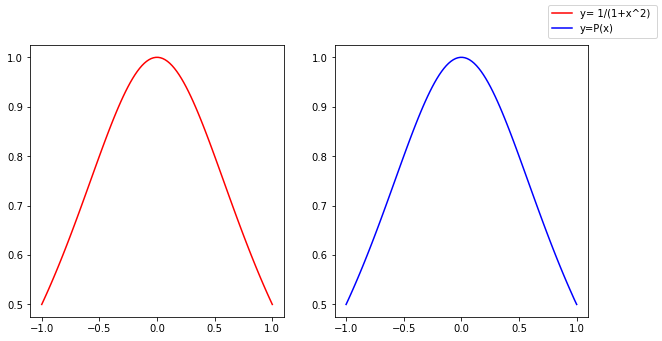

In [17]:
interpolation_Runge(50)

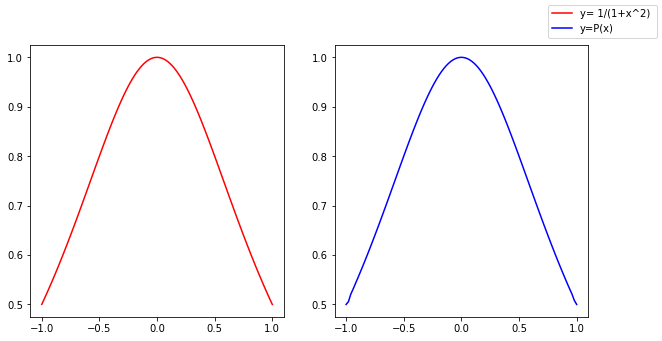

In [18]:
interpolation_Runge(55)

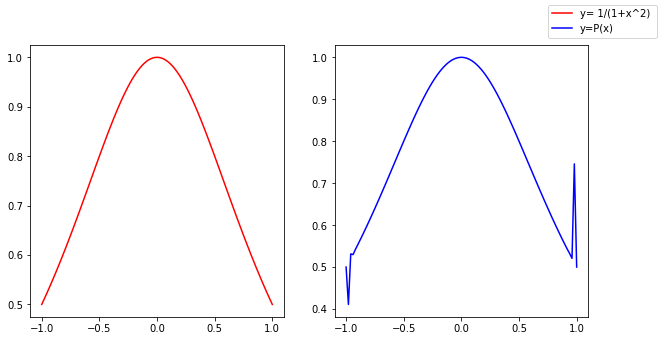

In [19]:
interpolation_Runge(60)

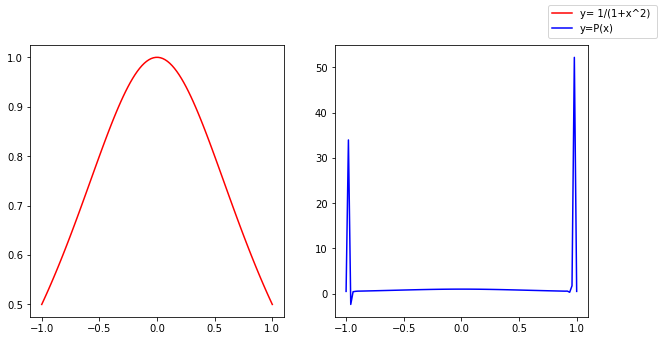

In [20]:
interpolation_Runge(70)

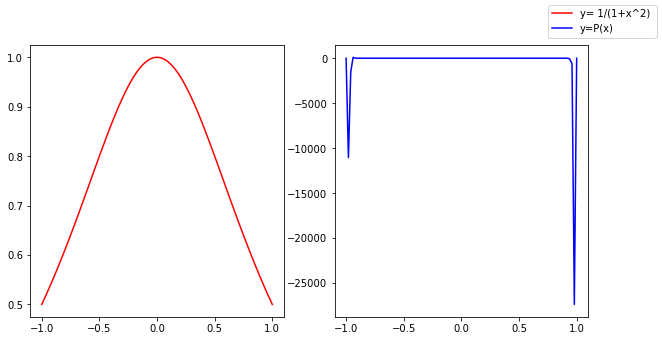

In [21]:
interpolation_Runge(80)

> Ici, on constate qu'à partir d'un certain nombre de points d'interpolation (environ 50), l'augmentation du nombre de points $n$ détériore l'approximation de la fonction donnée au lieu de l'améliorer.

In [22]:
def interpolation_Tchebycheff(N):
    def f1(x):
        return (1/(1+x**2))
    f = np.vectorize(f1)
    
    x = np.linspace(-1, 1, 100)
    
    x_tcheb = np.zeros((N+1,))
    for i in range(x_tcheb.shape[0]):
        x_tcheb[i] = np.cos((2*i+1)*np.pi/(2*N))

    P = Lagrange(x, x_tcheb, f(x_tcheb))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(x, f(x), '-r', label='y= 1/(1+x^2) ')
    ax2.plot(x, P, '-b', label='y=P(x)')
    fig.legend()

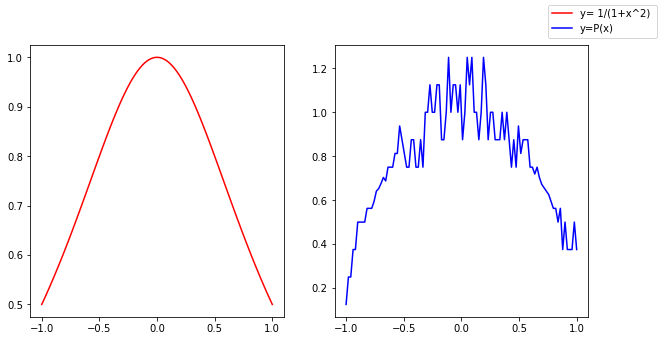

In [23]:
interpolation_Tchebycheff(2)

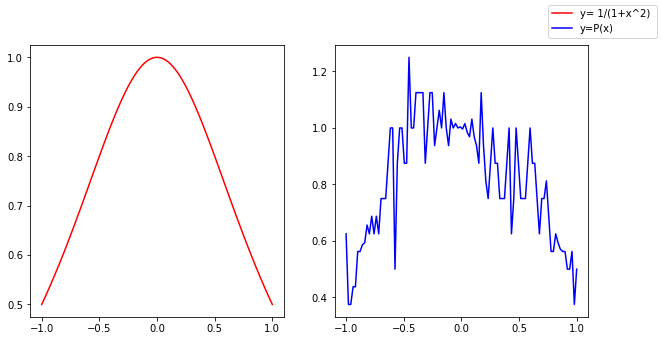

In [24]:
interpolation_Tchebycheff(3)

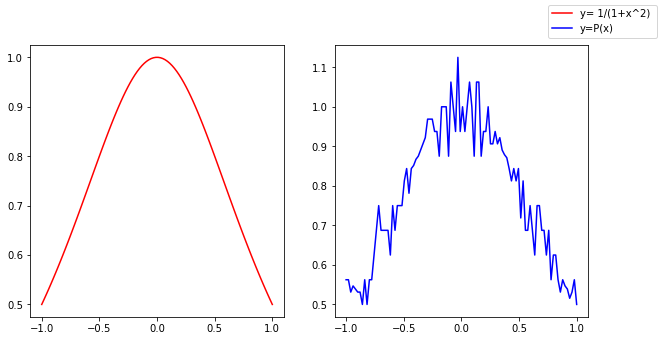

In [25]:
interpolation_Tchebycheff(4)

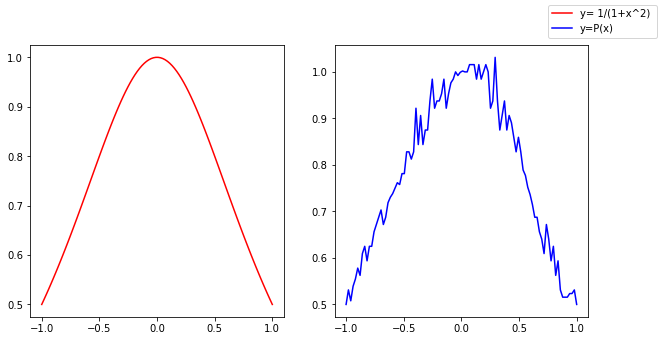

In [26]:
interpolation_Tchebycheff(5)

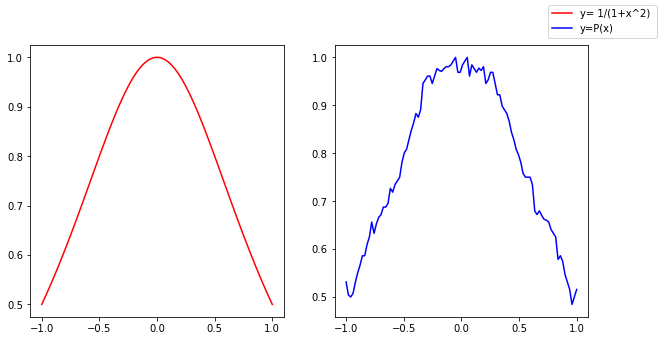

In [27]:
interpolation_Tchebycheff(10)

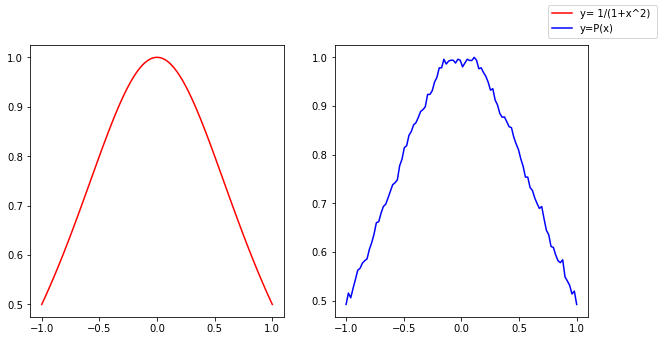

In [28]:
interpolation_Tchebycheff(20)

<ipython-input-2-56a0245e0d39>:12: RuntimeWarning: divide by zero encountered in double_scalars
  Li *= (x - x_pt[k])/(x_pt[i] - x_pt[k])


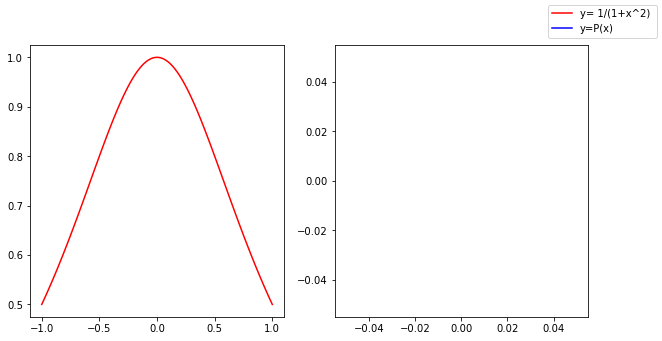

In [29]:
interpolation_Tchebycheff(30)

> On remarque qu'en augmentant le nombre de points de Tchebycheff, l'interpolée de f devient de plus en plus semblable à f.